In [6]:
import numpy as np
import pandas as pd
from scipy import integrate, signal
from scipy.optimize import fsolve
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from toy_models import *
%matplotlib widget

## f_XY_4eq does not consider the dynamic of Js

In [33]:
theta0 = np.radians(20)
Jmax = 1
J12 = 50

# FAR TARGETS

res_far = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_far = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 5000)

for _ in range(100):
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
    res_far.append(integrate.solve_ivp(lambda t, x: f_XY_4eq(x, t, params_far), [t[0], t[-1]], x0, t_eval=None, method='DOP853'))



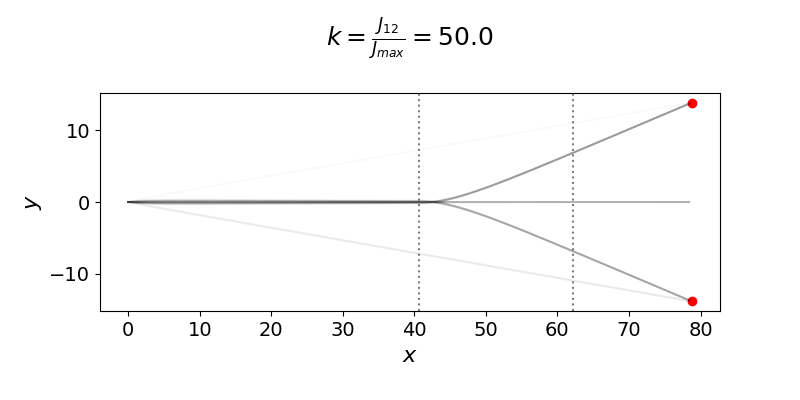

In [39]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_far:
    plot_traj_ax(r, params_far, ax, len(res_far))

ax.scatter(params_far[3], params_far[4], c='r')
ax.scatter(params_far[3], -params_far[4], c='r')
ax.axvline(params_far[3]-params_far[4]/np.tan(params_far[2]), c='black', ls=':', alpha=0.5)
ax.axvline(params_far[3]-params_far[4]/np.tan(2*params_far[2]), c='black', ls=':', alpha=0.5)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_far[0]/params_far[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [9]:
theta0 = np.radians(20)
Jmax = 1
J12 = 500

# FAR TARGETS

res_far_small_k = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_far = [J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 5000)

for _ in range(10):
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0)]
    res_far_small_k.append(integrate.solve_ivp(lambda t, x: f_XY_4eq(x, t, params_far), [t[0], t[-1]], x0, t_eval=None, method='DOP853'))



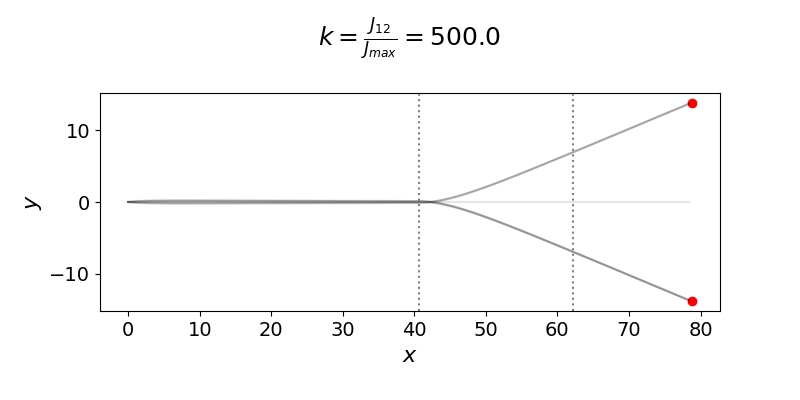

In [10]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(8, 4))

for r in res_far_small_k:
    plot_traj_ax(r, params_far, ax, len(res_far_small_k))

ax.scatter(params_far[3], params_far[4], c='r')
ax.scatter(params_far[3], -params_far[4], c='r')
ax.axvline(params_far[3]-params_far[4]/np.tan(params_far[2]), c='black', ls=':', alpha=0.5)
ax.axvline(params_far[3]-params_far[4]/np.tan(2*params_far[2]), c='black', ls=':', alpha=0.5)
# set title with value of J12/Jmax
ax.set_title(r'$k=\frac{J_{12}}{J_{max}} = $' + str(params_far[0]/params_far[1]) + '\n', fontsize=18)
# set same scale for x and y axis
ax.set_aspect('equal', 'box')
# set x label
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
# set ticks size
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

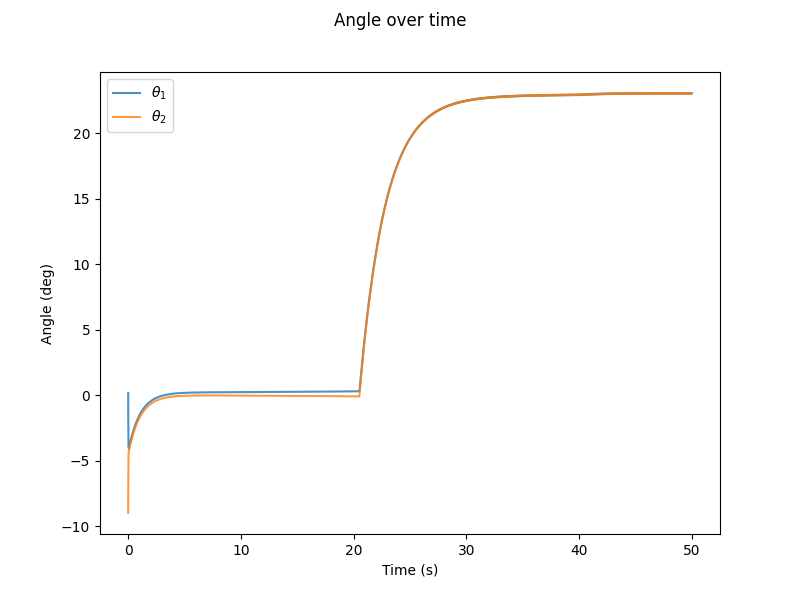

In [45]:
plot_thetas(res_far[0])

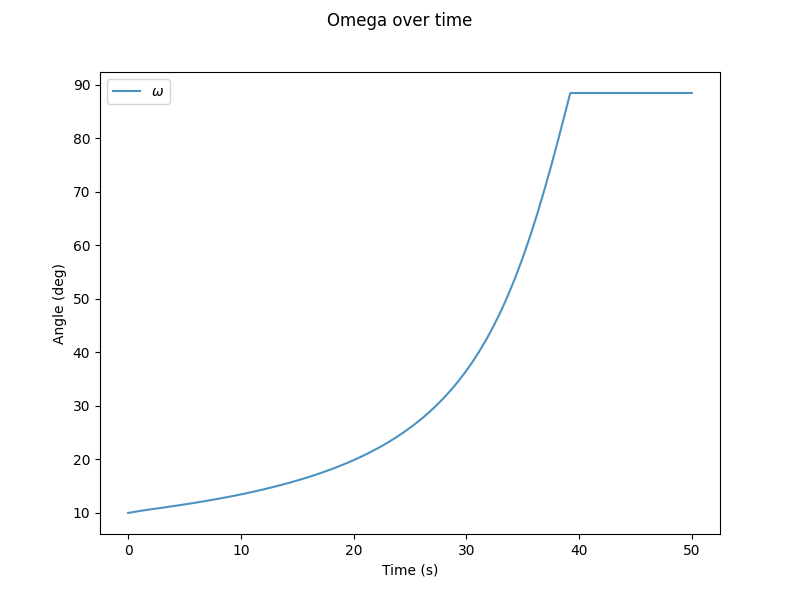

In [61]:
plot_omega(res_far_small_k[0], params_far[3], params_far[4])

## OBS:
- increasing J12 decrease the number of trajectories that stay in the compromise.



---
---
---
---
---
---
---
---
---
# f_XY does consider the dynamic of Js

### CASE K SMALL (J12/Jmax << 1)

In [4]:
theta0 = np.radians(20)
Jmax = 1
J12 = 50

# FAR TARGETS

res_far = []

#parameters (alpha, beta, J, Jmax, theta0, xt, yt)
params_far = [1000, 1000, J12, Jmax, theta0, 80*np.cos(np.radians(10)), 80*np.sin(np.radians(10))]

#time points
t = np.linspace(0, 50, 1000)

for _ in range(10):
    # generate random initial conditions for theta1 and theta2 between -pi/2 and pi/2
# x0 = [0, 0, np.radians(0), -np.radians(20), 0.5, 0.5]
    x0 = [0, 0, np.random.uniform(0, np.pi/6), np.random.uniform(-np.pi/6, 0), 1, 1]
    res_far.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_far), [t[0], t[-1]], x0, t_eval=t))

############################################################################################################

# CLOSE TARGET

# res_close = []

# #parameters (alpha, beta, J, Jmax, theta0, xt, yt)
# params_close = [0.1, 0.05, J12, Jmax, theta0, 80*np.cos(np.radians(40)), 80*np.sin(np.radians(40))]

# #time points
# t = np.linspace(0, 100, 5000)

# for _ in range(10):
#     # generate random initial conditions for theta1 and theta2 between -pi/2 and pi/2
# # x0 = [0, 0, np.radians(5), -np.radians(20), 0.5, 0.5]
#     x0 = [0, 0, np.random.uniform(-np.pi/2, np.pi/2), np.random.uniform(-np.pi/2, np.pi/2), 0.5, 0.5]
#     res_close.append(integrate.solve_ivp(lambda t, x: f_XY(x, t, params_close), [t[0], t[-1]], x0, t_eval=None))

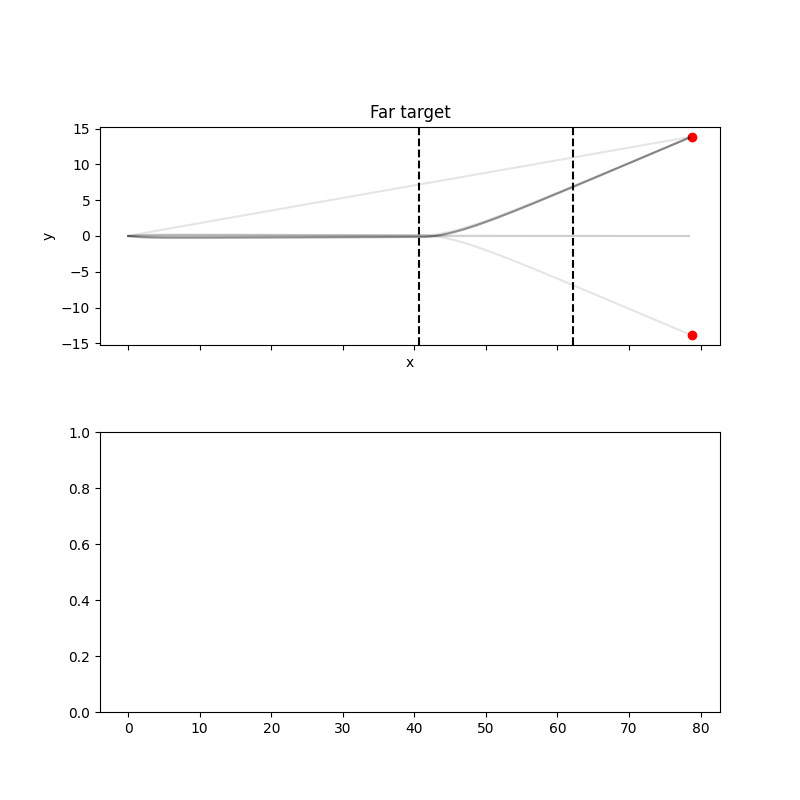

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 8))

for r in res_far:
    plot_traj_ax(r, params_far, ax[0], len(res_far))

# for r in res_close:
#     plot_traj_ax(r, params_close, ax[1])

# plot_traj_ax(res_close[3], params_close, ax[1])

ax[0].scatter(params_far[5], params_far[6], c='r')
ax[0].scatter(params_far[5], -params_far[6], c='r')
ax[0].axvline(params_far[5]-params_far[6]/np.tan(2*params_far[4]), c='black', ls='--')
ax[0].axvline(params_far[5]-params_far[6]/np.tan(params_far[4]), c='black', ls='--')
ax[0].set_title('Far target')
# ax[1].scatter(params_close[5], params_close[6], c='r')
# ax[1].scatter(params_close[5], -params_close[6], c='r')
# ax[1].set_title('Close target')
# set same scale for x and y axis
ax[0].set_aspect('equal', 'box')
# ax[1].set_aspect('equal', 'box')
plt.show()

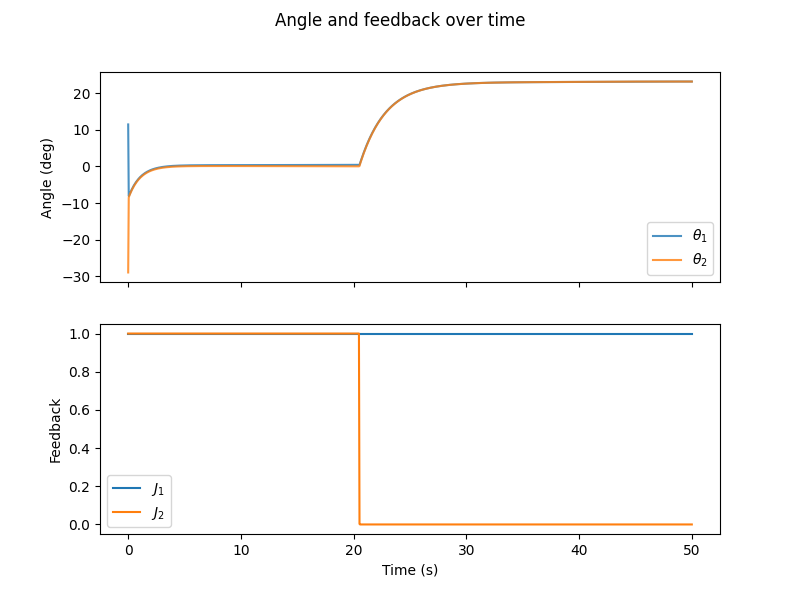

In [104]:
plot_thetasJs(res_far[0])

In [ ]:
plot_omega(res_far[0], params_far[5], params_far[6])
plt.axvline(35, c='black', ls='--')

Some comments:

Evolving the system time dependent, when the system starts from far (i.e. small omega at t=0) the Js go to zero. In this case when $\theta_1=\theta_2$ the system is in a "minimum" of potential and it doesn't move